This is an analysis of the German Credit Dataset (https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) from the UCI Machine Learning Repository. It involves predicting credit risk based on a set of attributes.

In [13]:
table.shape

(1000, 20)

#### The table dimenstions at (1000,20), just as expected.

In [14]:
table.head()

,c1,c2,c3,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21
1,A11,24,A33,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
2,A12,30,A34,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201,2
3,A12,12,A32,1295,A61,A72,3,A92,A101,1,A123,25,A143,A151,1,A173,1,A191,A201,2
4,A11,24,A34,1199,A61,A75,4,A93,A101,4,A123,60,A143,A152,2,A172,1,A191,A201,2
5,A11,15,A32,1403,A61,A73,2,A92,A101,4,A123,28,A143,A151,1,A173,1,A191,A201,1


In [15]:
# Renaming columns
columns = ['checkin_acc', 'duration', 'credit_history', 'amount',
         'saving_acc', 'present_emp_since', 'inst_rate', 'personal_status',
         'other_debtors', 'residing_since', 'property', 'age',
         'inst_plans', 'housing', 'num_credits',
         'job', 'dependents', 'telephone', 'foreign_worker', 'status']
credit_df = table
credit_df.columns = columns

In [16]:
credit_df.head()

,checkin_acc,duration,credit_history,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
1,A11,24,A33,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
2,A12,30,A34,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201,2
3,A12,12,A32,1295,A61,A72,3,A92,A101,1,A123,25,A143,A151,1,A173,1,A191,A201,2
4,A11,24,A34,1199,A61,A75,4,A93,A101,4,A123,60,A143,A152,2,A172,1,A191,A201,2
5,A11,15,A32,1403,A61,A73,2,A92,A101,4,A123,28,A143,A151,1,A173,1,A191,A201,1


In [17]:
credit_df.shape

(1000, 20)

In [18]:
credit_df.describe()

,checkin_acc,duration,credit_history,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,33,5,921,5,5,4,4,3,4,4,53,3,3,4,4,2,2,2,2
top,A14,24,A32,1393,A61,A73,4,A93,A101,4,A123,27,A143,A152,1,A173,1,A191,A201,1
freq,394,184,530,3,603,339,476,548,907,413,332,51,814,713,633,630,845,596,963,700


In [19]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 12
Data columns (total 20 columns):
checkin_acc          1000 non-null object
duration             1000 non-null object
credit_history       1000 non-null object
amount               1000 non-null object
saving_acc           1000 non-null object
present_emp_since    1000 non-null object
inst_rate            1000 non-null object
personal_status      1000 non-null object
other_debtors        1000 non-null object
residing_since       1000 non-null object
property             1000 non-null object
age                  1000 non-null object
inst_plans           1000 non-null object
housing              1000 non-null object
num_credits          1000 non-null object
job                  1000 non-null object
dependents           1000 non-null object
telephone            1000 non-null object
foreign_worker       1000 non-null object
status               1000 non-null object
dtypes: object(20)
memory usage: 164.1+ KB


### EDA

In [20]:
import matplotlib.pyplot as plt
credit_df['status'] =credit_df['status'].astype(int)
credit_df['status'] = abs(credit_df['status'] - 2)
credit_df['status'].head()

1    0
2    0
3    0
4    0
5    1
Name: status, dtype: int32

### Looking at the distribution of good vs bad credit customers

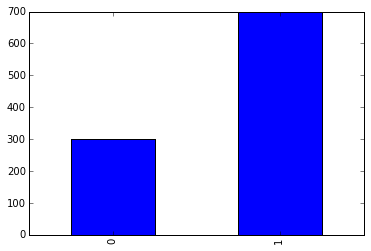

In [21]:
# Let's see the distribution of good and bad credit in the dataset.
labels = credit_df['status'].astype(int)
vc = labels.value_counts().sort_index()
vc.plot(kind='bar')


#### Looks like 70% of the customers have good credit and 30% have bad credit. This is a highly unbalanced dataset.

In [22]:
credit_df['amount'] = credit_df['amount'].astype(float)
credit_df['age'] = credit_df['age'].astype(float)

### Variation of credit amount with age

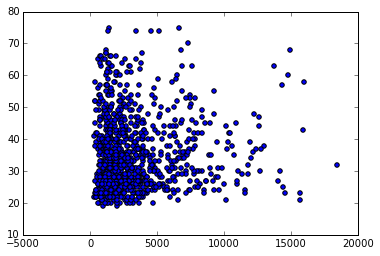

In [23]:
# Variation of credit amount with age
plt.scatter(table["amount"],table["age"])
plt.figure()

### Variation of credit amount with duration

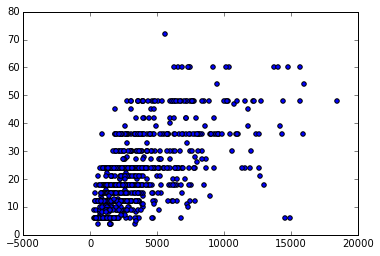

In [24]:
# Variation of Credit amount and duration
plt.scatter(table['amount'],table["duration"])
plt.figure()

### Let's look at distribution of no of customers by age

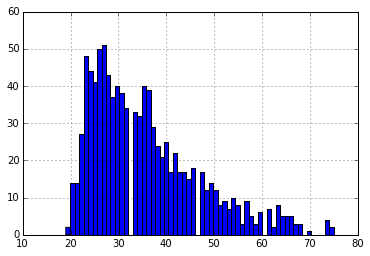

In [25]:
# Distribution of frequency by age
table['age'].hist(bins=60)

#### Clearly a vast majority of the customers are under the age of 40.

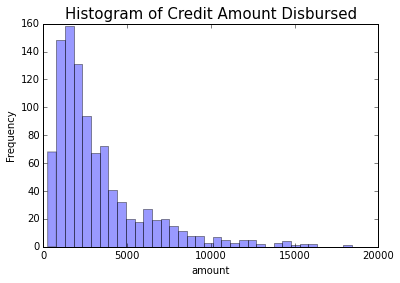

In [26]:
!pip install seaborn
import seaborn as sn
sn.distplot( credit_df.amount, kde = False )
plt.title( "Histogram of Credit Amount Disbursed", fontsize = 15)
plt.ylabel( "Frequency")

#### As we can see, a large percentage of the credit disbursed is 5000 dollars or lower

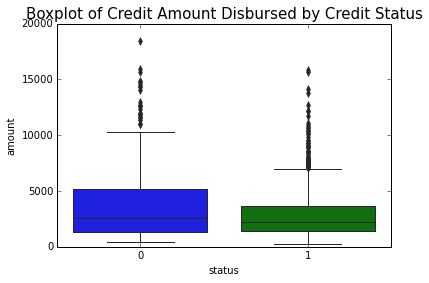

In [27]:
sn.boxplot( x = 'status', y = 'amount', data = credit_df, orient = 'v' )
plt.title( "Boxplot of Credit Amount Disbursed by Credit Status", fontsize = 15)

#### As we can see from the plot above, the credit amount is on average higher for customers with good credit that for customers with bad credit

### Frequency distribution of credit amount for customers with good credit and bad credit

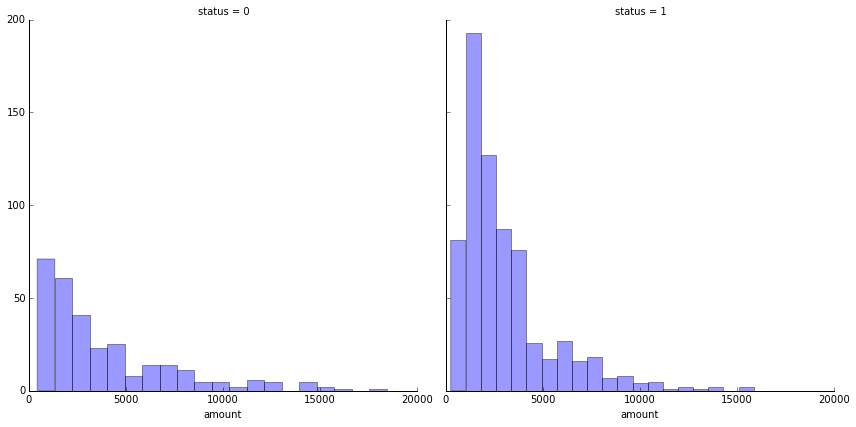

In [28]:
g = sn.FacetGrid(credit_df, col="status", size = 6)
g.map(sn.distplot, "amount", kde = False, bins = 20 )

#### It is interesting to note that credit amounts greater than 10000 are mostly defaulted

### Analyzing effect of interest rates on credit defaults

In [29]:
credit_df['inst_rate'] = credit_df['inst_rate'].astype(int)
credit_df.inst_rate.unique()



array([3, 4, 2, 1], dtype=int64)

In [30]:
rate_count = credit_df[['inst_rate', 'status']].groupby(['inst_rate', 'status']).size().reset_index()
rate_count.columns = ['inst_rate', 'status', 'count']
rate_count

,inst_rate,status,count
0,1,0,34
1,1,1,102
2,2,0,62
3,2,1,169
4,3,0,45
5,3,1,112
6,4,0,159
7,4,1,317


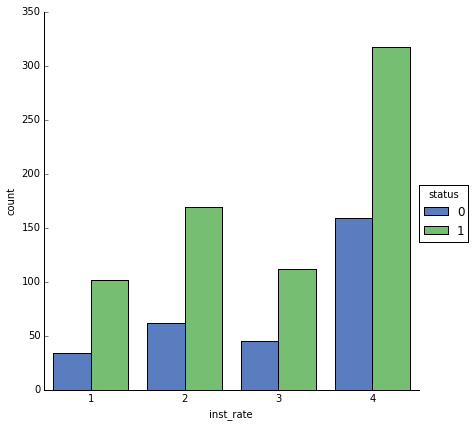

In [31]:
g = sn.factorplot(x="inst_rate", y = 'count', hue="status", data=rate_count,
                 size=6, kind="bar", palette="muted")

#### It is not surprising to note that as the interest rate increases, so does the default rate

### Credit Amount for different interest rates and their impact on bad credit

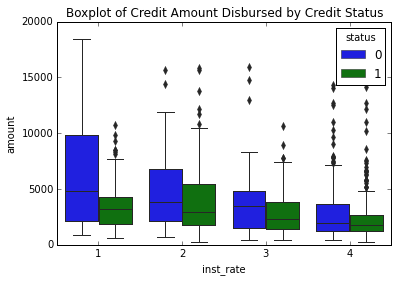

In [32]:
sn.boxplot( x = 'inst_rate', y = 'amount', hue = 'status', data = credit_df, orient = 'v' )
plt.title( "Boxplot of Credit Amount Disbursed by Credit Status", fontsize = 12)

#### In general, we can see that credit amount disbursed decreases as interest rate increases.

## Model Building


My approach involves building an SVM and a Logistic Regression Model and consists of the follwing steps:

1. Feature Engineering - Prescaling numeric features, and one hot encoding for categorical features
2. Creating a training and testing split
3. Hyperparameter optimization and cross validation
4. Making predictions on testing data and reporting performance metrics (accuracy, precision, recall, AUC)

## 1. SVM:

### Feature Engineering

In [33]:
# Making sure al numeric features are integers or float values
numeric_features = [credit_df['duration'], credit_df['amount'], credit_df['inst_rate'], credit_df['age'],
                    credit_df['residing_since'],credit_df['num_credits'], credit_df['dependents']]

for f in numeric_features:
    f = f.astype(float)


In [34]:

# Prescaling all numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

credit_df[['duration', 'amount', 'inst_rate', 'age', 'residing_since', 'num_credits' , 'dependents'  ]] = scaler.fit_transform(
    credit_df[['duration', 'amount', 'inst_rate', 'age', 'residing_since', 'num_credits' , 'dependents']])


In [35]:
credit_df.head(5)

,checkin_acc,duration,credit_history,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
1,A11,0.256953,A33,0.566664,A61,A73,0.024147,A93,A101,1.046987,A124,1.535122,A143,A153,1.027079,A173,2.334869,A191,A201,0
2,A12,0.754763,A34,0.695681,A61,A71,0.918477,A94,A101,-0.765977,A123,-0.663689,A143,A152,1.027079,A174,-0.428290,A191,A201,0
3,A12,-0.738668,A32,-0.700472,A61,A72,0.024147,A92,A101,-1.672459,A123,-0.927547,A143,A151,-0.704926,A173,-0.428290,A191,A201,0
4,A11,0.256953,A34,-0.734498,A61,A75,0.918477,A93,A101,1.046987,A123,2.150789,A143,A152,1.027079,A172,-0.428290,A191,A201,0
5,A11,-0.489762,A32,-0.662192,A61,A73,-0.870183,A92,A101,1.046987,A123,-0.663689,A143,A151,-0.704926,A173,-0.428290,A191,A201,1


In [36]:
# One hot Encoding for categorical features
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

enc = OneHotEncoder()
le = LabelEncoder()


categorical_features_enc = [credit_df['checkin_acc'], credit_df['credit_history'], credit_df['saving_acc'], 
                            credit_df['present_emp_since'], credit_df['personal_status'], credit_df['other_debtors'],
                            credit_df['property'], credit_df['inst_plans'], credit_df['housing'], credit_df['job'],
                            credit_df['telephone'], credit_df['foreign_worker']]
for f in categorical_features_enc:
     f = le.fit_transform(f)


In [37]:
credit_df.head(5)

,checkin_acc,duration,credit_history,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
1,A11,0.256953,A33,0.566664,A61,A73,0.024147,A93,A101,1.046987,A124,1.535122,A143,A153,1.027079,A173,2.334869,A191,A201,0
2,A12,0.754763,A34,0.695681,A61,A71,0.918477,A94,A101,-0.765977,A123,-0.663689,A143,A152,1.027079,A174,-0.428290,A191,A201,0
3,A12,-0.738668,A32,-0.700472,A61,A72,0.024147,A92,A101,-1.672459,A123,-0.927547,A143,A151,-0.704926,A173,-0.428290,A191,A201,0
4,A11,0.256953,A34,-0.734498,A61,A75,0.918477,A93,A101,1.046987,A123,2.150789,A143,A152,1.027079,A172,-0.428290,A191,A201,0
5,A11,-0.489762,A32,-0.662192,A61,A73,-0.870183,A92,A101,1.046987,A123,-0.663689,A143,A151,-0.704926,A173,-0.428290,A191,A201,1


In [38]:
credit_df = pd.get_dummies(credit_df, columns = ['checkin_acc',  'credit_history', 
         'saving_acc', 'present_emp_since',  'personal_status',
         'other_debtors', 'property', 'inst_plans', 'housing', 
         'job',  'telephone', 'foreign_worker'])

In [39]:
credit_df.head(5)

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status,checkin_acc_A11,checkin_acc_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
1,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,0,1,0,...,0,1,0,0,1,0,1,0,1,0
2,0.754763,0.695681,0.918477,-0.765977,-0.663689,1.027079,-0.428290,0,0,1,...,1,0,0,0,0,1,1,0,1,0
3,-0.738668,-0.700472,0.024147,-1.672459,-0.927547,-0.704926,-0.428290,0,0,1,...,0,0,0,0,1,0,1,0,1,0
4,0.256953,-0.734498,0.918477,1.046987,2.150789,1.027079,-0.428290,0,1,0,...,1,0,0,1,0,0,1,0,1,0
5,-0.489762,-0.662192,-0.870183,1.046987,-0.663689,-0.704926,-0.428290,1,1,0,...,0,0,0,0,1,0,1,0,1,0


### Creating training/testing sets

In [40]:
y = credit_df['status']
X = credit_df.drop('status',axis = 1)

In [41]:
# Creating training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

C:\Users\Win\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
X_train.shape

(700, 51)

In [43]:
y_train.shape

(700L,)

### Hyperparameter Optimization and Model Evaluation with Cross Validation

Our goal here is to minimize the false positives, because we shouldn't risk lending money to someone who is likely to default
on the loan. Since a high precision relates to a low false positive rate, our goal in hyperparameter optimization is to maximize precision.

In [44]:

# Cross Validation

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt





In [45]:
# Set the parameters by cross-validation
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-4],
                     'C': [1, 10, 100, 1000]}]

scores = ['precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5, scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))

# Tuning hyper-parameters for precision
()
Best parameters set found on development set:
()
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
()
Grid scores on development set:
()
0.700 (+/-0.000) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.700 (+/-0.000) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.700 (+/-0.000) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.700 (+/-0.000) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.711 (+/-0.005) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.711 (+/-0.005) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.758 (+/-0.014) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
0.758 (+/-0.014) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}


C:\Users\Win\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


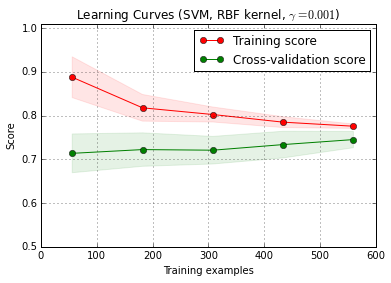

In [46]:
title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
plot_learning_curve(estimator, title, X_train, y_train, (0.5, 1.01), cv=cv)

plt.show()

In [47]:
# Training the model
clf = SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

### Making predictions on testing data, and seeing the performance metrics - AUC, accuracy, precision, recall

In [48]:
y_pred = clf.predict(X_test)

In [49]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)


0.65634920634920635

In [50]:
accuracy_score(y_test,y_pred)

0.76333333333333331

In [51]:
precision_score(y_test, y_pred)

0.77911646586345384

In [52]:
recall_score(y_test,y_pred)

0.92380952380952386

### Performance Summary for SVC with gaussian kernel:
#### AUC = 0.656, Accuracy = 0.763, Precision = 0.779, Recall = 0.923


## 2. Logistic Regression
 I think Logistic regression would work well here because this is a simple binary classification problem, where the features are not correlated, and the observations are independent.

In [53]:
from sklearn.linear_model import LogisticRegression as logreg
from sklearn import linear_model

### Hyperparameter optimization and cross validation

Our goal here is to minimize the false positives, because we shouldn't risk lending money to someone who is likely to default
on the loan. Since a high precision relates to a low false positive rate, our goal in hyperparameter optimization is to maximize precision.

In [54]:


tuned_parameters = [{'C': [1, 10, 100, 1000]}]

scores = ['precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(logreg(C=1), tuned_parameters, cv=5, scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))

# Tuning hyper-parameters for precision
()
Best parameters set found on development set:
()
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
()
Grid scores on development set:
()
0.778 (+/-0.011) for {'C': 1}
0.782 (+/-0.008) for {'C': 10}
0.783 (+/-0.008) for {'C': 100}
0.783 (+/-0.008) for {'C': 1000}


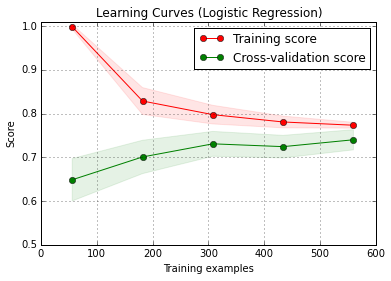

In [55]:
# Cross Validation - Model Evaluation
title = "Learning Curves (Logistic Regression)"

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = linear_model.LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
plot_learning_curve(estimator, title, X_train, y_train, (0.5, 1.01), cv=cv)

plt.show()

### Fitting model on training data with optimal hyperparameters

In [56]:
logreg = linear_model.LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# we create an instance of Neighbours Classifier and fit the data.
clf = logreg.fit(X_train, y_train)

### Predicting on testing data and reporting performance metrics

In [57]:
# Predict on testing set
y_pred = clf.predict(X_test)

In [58]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)


0.68492063492063493

In [59]:
accuracy_score(y_test,y_pred)

0.77666666666666662

In [60]:
precision_score(y_test, y_pred)

0.79668049792531115

In [61]:
recall_score(y_test,y_pred)

0.91428571428571426

### Performance Summary for Logistic Regression Model:
#### AUC = 0.684, accuracy = 0.776, precision = 0.796, recall = 0.914